# Regression Analysis of Boston Housing Prices

###### about Dataset


### Boston House Prices Dataset Info

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston, Massachusetts. The goal of the regression problem is to predict the **median value of owner-occupied homes (MEDV)** in $1000s using various features related to the town or suburb.

#### Dataset Attributes:
1. **CRIM**: Per capita crime rate by town.
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**: Proportion of non-retail business acres per town.
4. **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. **NOX**: Nitric oxides concentration (parts per 10 million).
6. **RM**: Average number of rooms per dwelling.
7. **AGE**: Proportion of owner-occupied units built prior to 1940.
8. **DIS**: Weighted distances to five Boston employment centers.
9. **RAD**: Index of accessibility to radial highways.

10. **TAX**: Full-value property tax rate per $10,000.

11. **PTRATIO**: Pupil-teacher ratio by town.

12. **B**: 1000(Bk - 0.63)^2, where Bk is the proportion of blacks by town.

13. **LSTAT**: Percentage of lower status of the population.

14. **MEDV**: Median value of owner-occupied homes in $1000s (Target variable).

#### Data Information:
- **Source**: The data is drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.
- **Size**: There are 506 instances in the dataset.
- **Task**: Predictive regression modeling.
  


In [76]:
#import pakages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import sklearn.datasets
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error

### Explore Data

In [21]:
#load dataset 
df_houe_price = pd.read_csv("dataset/housing.csv" ,delim_whitespace=True, names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])


In [22]:
#show data head 
df_houe_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
#last data
df_houe_price.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [24]:
#shape data
df_houe_price.shape

(506, 14)

In [25]:
#information dataset
df_houe_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [90]:
#name columns 
features=df_houe_price.columns.to_list()


In [26]:
#describe data statistical
df_houe_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
#check is null dataset
df_houe_price.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [31]:
# Count number  duplicate rows 
df_houe_price.duplicated().sum()


0

In [51]:
#correlation of dataset
corr_data= df_houe_price.corr()
corr_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [53]:
#  correlation of all columns with  target 'MEDV'
medv_corr = df_houe_price.corr()['MEDV']


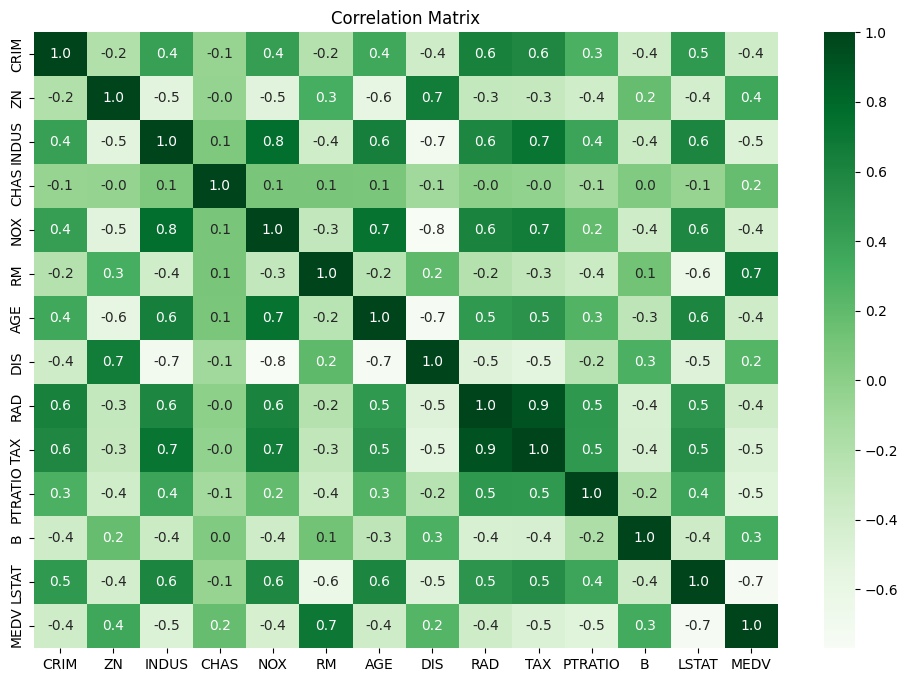

In [96]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_data, annot=True, cmap='Greens', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

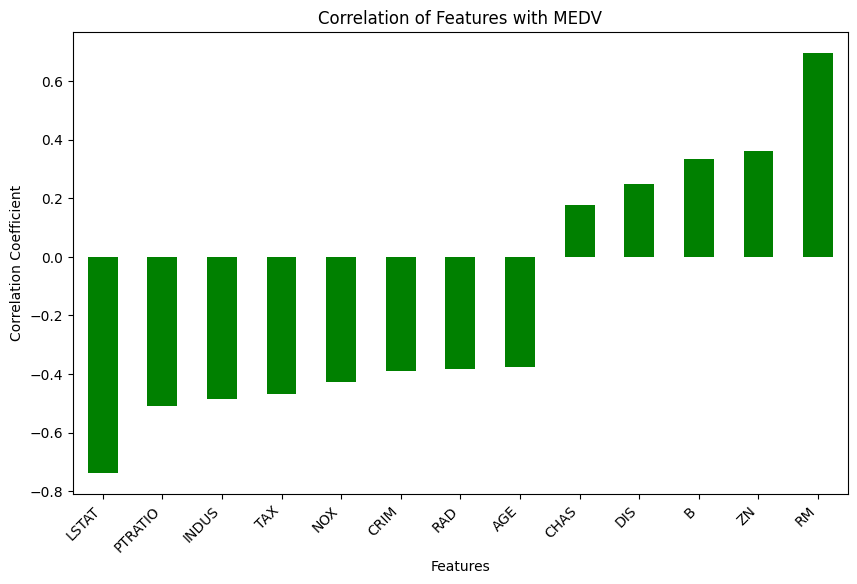

In [58]:
#  correlation with 'MEDV'
# Plot correlation values
plt.figure(figsize=(10, 6))
medv_corr.drop('MEDV').sort_values().plot(kind='bar',color='green')
plt.title('Correlation of Features with MEDV')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

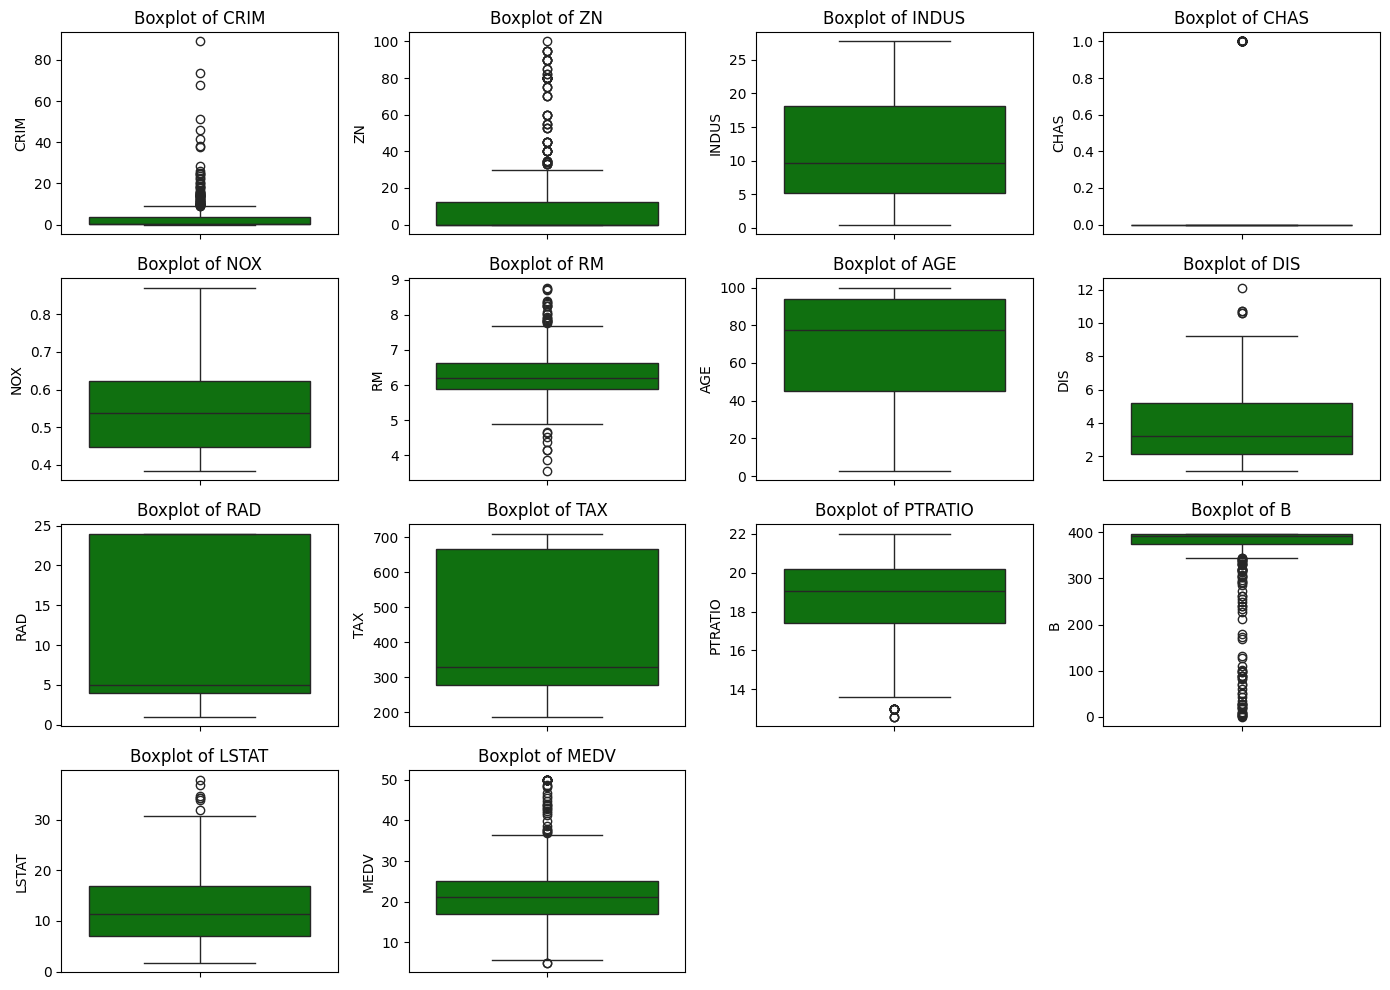

In [97]:
# Detect outliers using boxplots
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_houe_price[feature], color='green')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

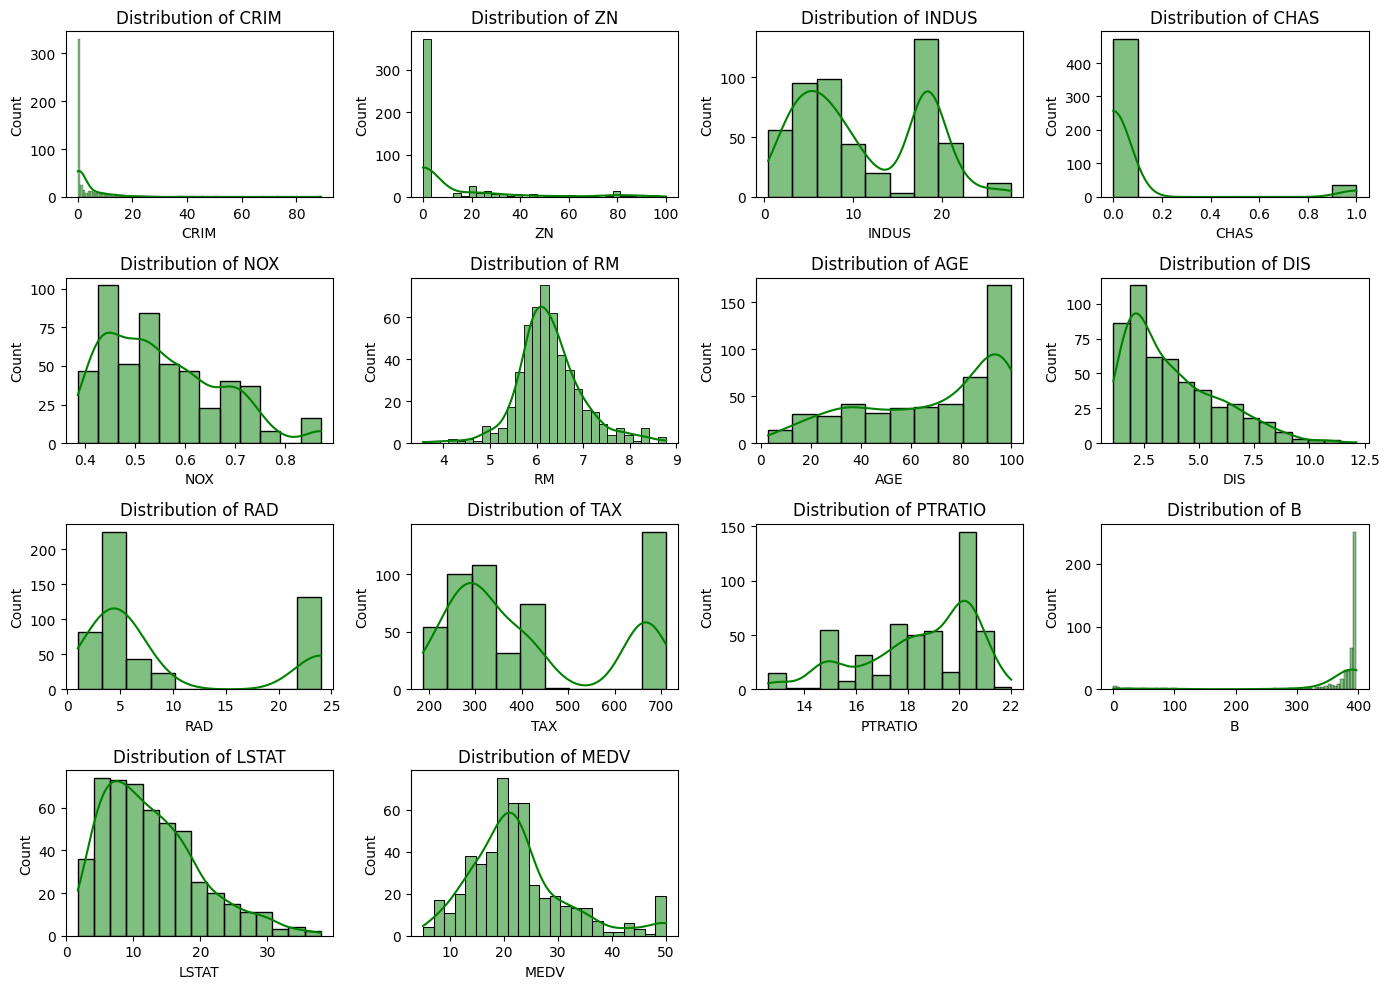

In [98]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_houe_price[feature], kde=True, color='green')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

### Modeling 

In [60]:
# Drop the target variable and separate features and target
x = df_houe_price.drop('MEDV', axis=1)
y = df_houe_price['MEDV']

In [61]:
# Split  data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [62]:
# Check the shapes of the resulting datasets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (404, 13)
Testing set features shape: (102, 13)
Training set target shape: (404,)
Testing set target shape: (102,)


In [64]:
#   XGBRegressor model
model = XGBRegressor()

In [65]:
# Train model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
#  predictions
predicted = model.predict(X_test)

#### Evaluation

In [71]:
#R2
r2=r2_score(predicted,y_test)


In [73]:
print(f"R2 Score: {r2:.2f}")

R2 Score: 0.89


In [74]:
#mae 
mae=mean_absolute_error(y_test , predicted)


In [75]:
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 1.96


In [77]:
#mse 
mse=mean_squared_error(y_test , predicted)


In [78]:
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 6.56
